In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
dfPokemon = pd.read_csv('dataPokemon.csv')
dfPokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Bug,309,39,52,43,60,50,65,1,False


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Bug,309,39,52,43,60,50,65,1,False


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\si

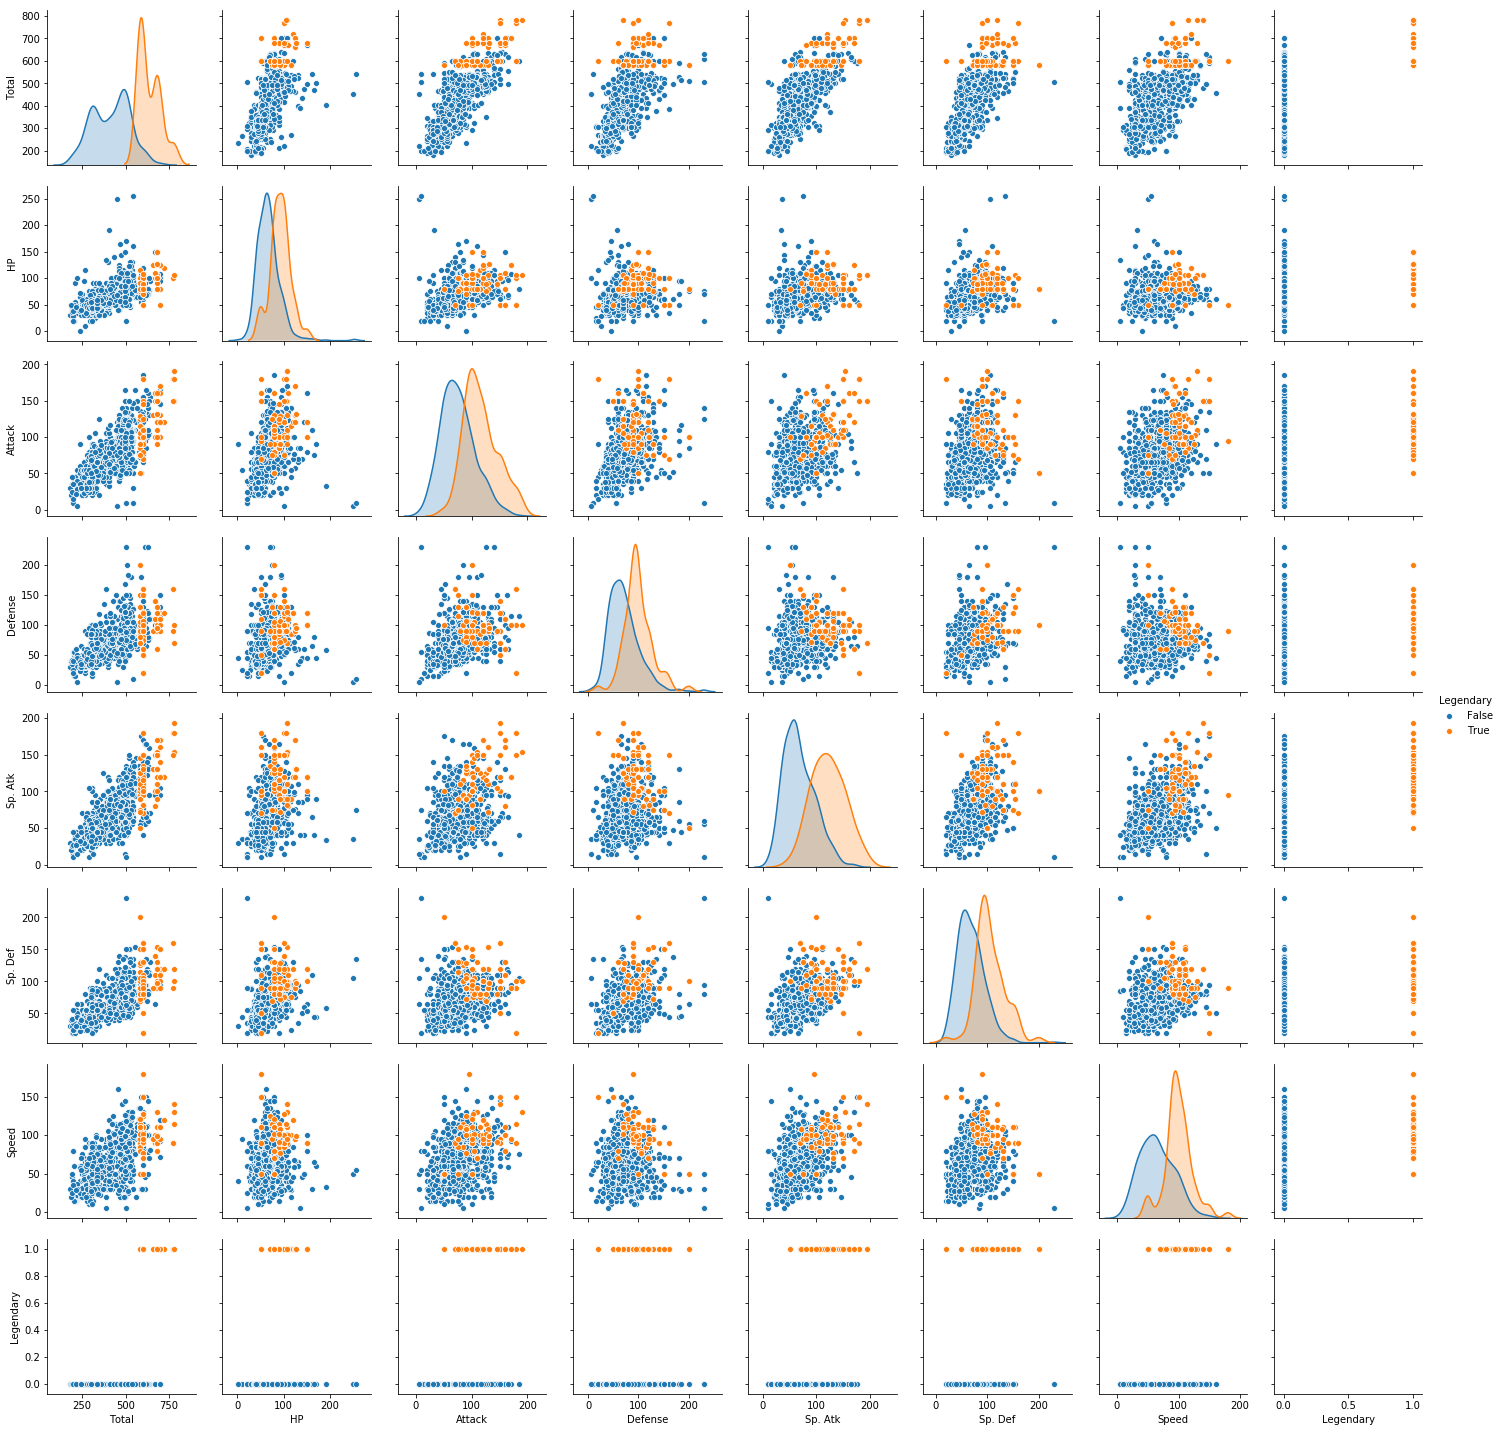

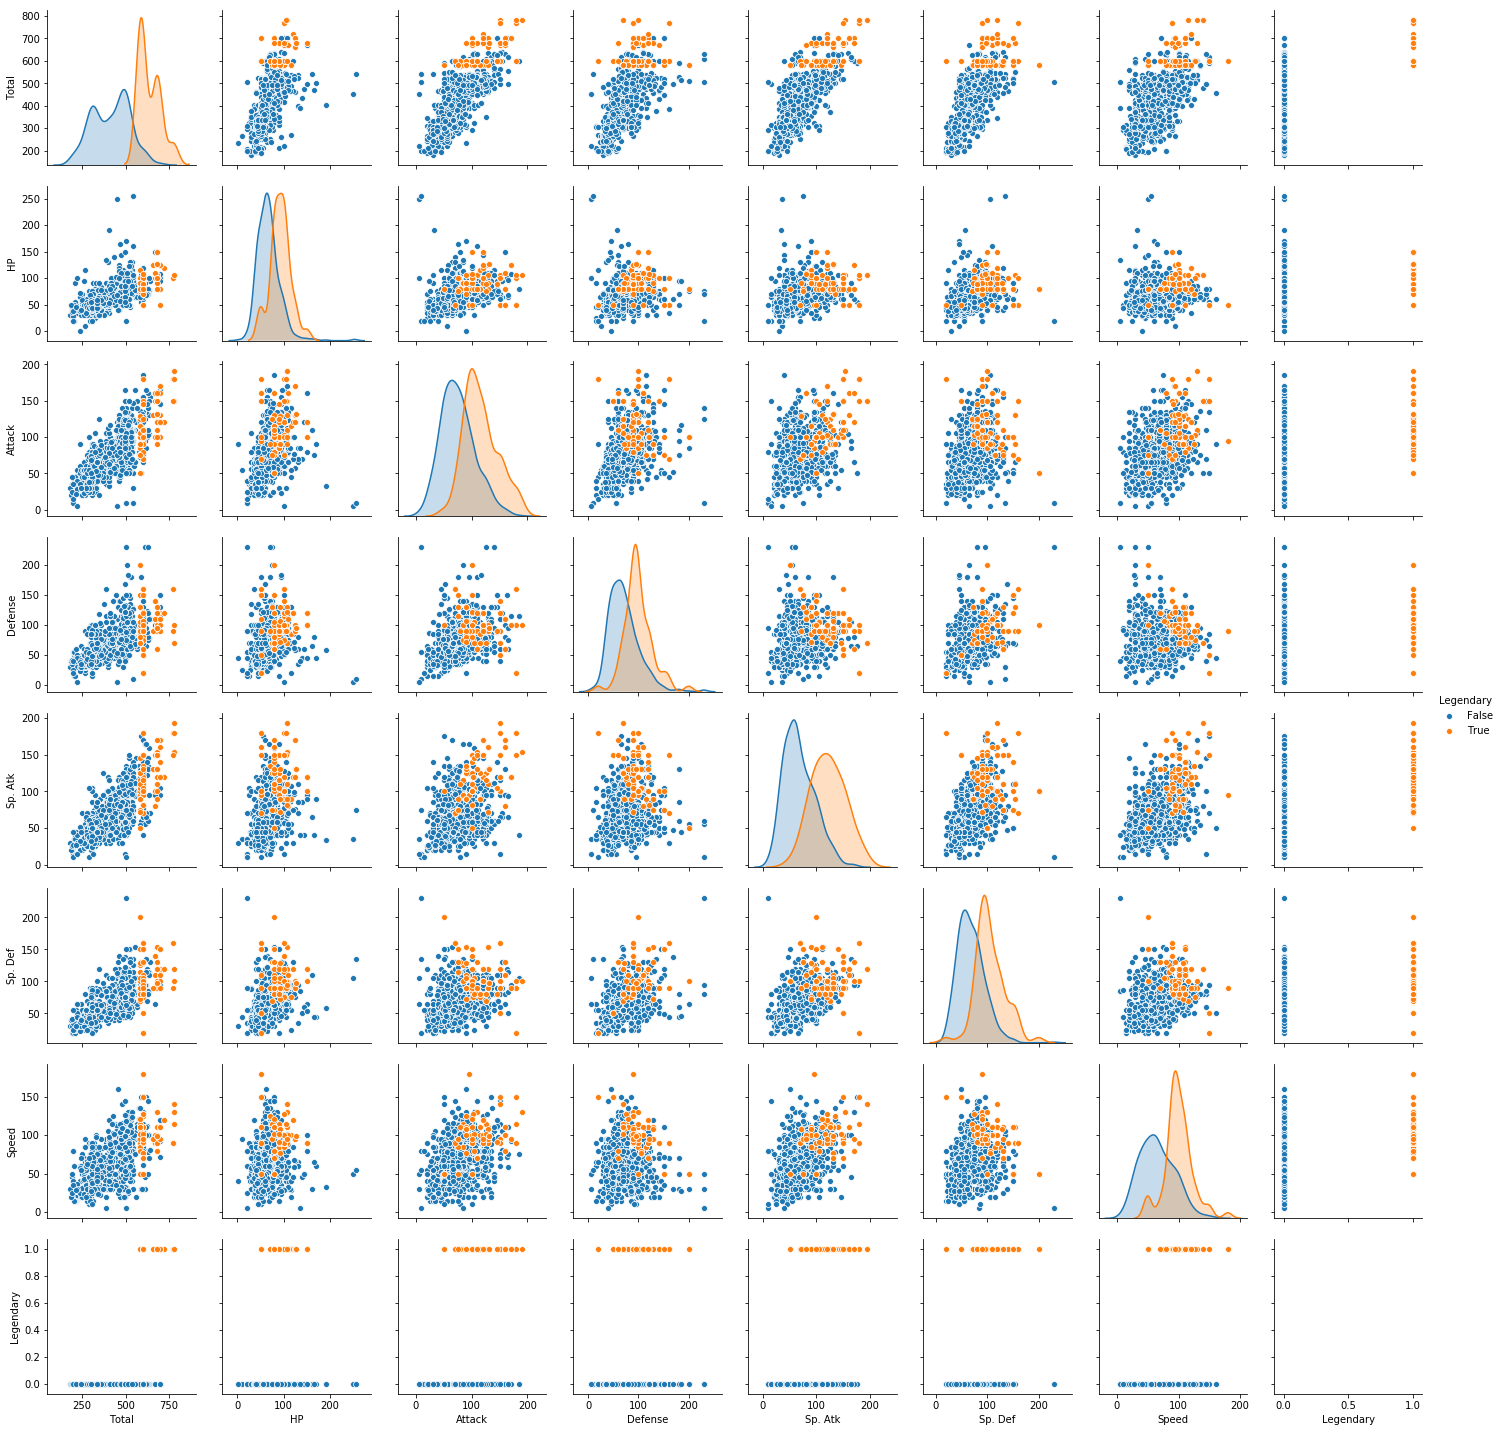

In [3]:
sns.pairplot(dfPokemon.drop(['#','Generation'],axis=1), hue = 'Legendary')

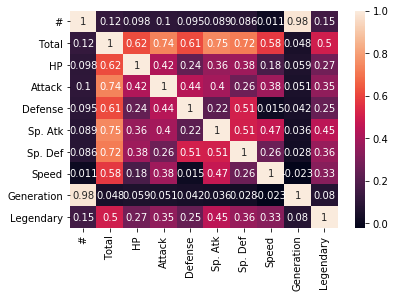

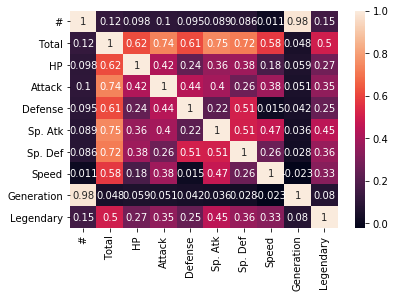

In [4]:
sns.heatmap(dfPokemon.corr(),annot=True)

In [5]:
dfPokemon['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

False    735
True      65
Name: Legendary, dtype: int64

In [6]:
data = dfPokemon.drop(['Legendary','#','Generation', 'Type 1', 'Type 2','Name'], axis=1)
target = dfPokemon['Legendary']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,target,test_size=0.30,random_state=101)

In [7]:
X_train.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
332,530,70,110,180,60,60,50
572,316,50,53,48,53,48,64
58,440,65,70,60,65,65,115
474,350,55,66,44,44,56,85
16,195,40,35,30,20,20,50


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
332,530,70,110,180,60,60,50
572,316,50,53,48,53,48,64
58,440,65,70,60,65,65,115
474,350,55,66,44,44,56,85
16,195,40,35,30,20,20,50


In [8]:
from sklearn.ensemble import RandomForestClassifier

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
rfc = RandomForestClassifier(n_estimators=100)

In [10]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [12]:
predict = rfc.predict(X_test)
predictProb = rfc.predict_proba(X_test)
con = pd.DataFrame(data=confusion_matrix(Y_test,predict), columns=['P False','P True'], index=['A False','A True'])
print(con)
print(confusion_matrix(Y_test, predict))
print(classification_report(Y_test, predict))
print('Accuracy = ',accuracy_score(Y_test, predict))


         P False  P True
A False      214       5
A True        10      11
[[214   5]
 [ 10  11]]
             precision    recall  f1-score   support

      False       0.96      0.98      0.97       219
       True       0.69      0.52      0.59        21

avg / total       0.93      0.94      0.93       240

Accuracy =  0.9375
         P False  P True
A False      214       5
A True        10      11
[[214   5]
 [ 10  11]]
             precision    recall  f1-score   support

      False       0.96      0.98      0.97       219
       True       0.69      0.52      0.59        21

avg / total       0.93      0.94      0.93       240

Accuracy =  0.9375


In [15]:
cuspredict = []
for item in predictProb[:,1]:
    if(item > 0.05):
        cuspredict.append(True)
    else:
        cuspredict.append(False)
print(cuspredict)

[False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, True, False, False, True, True, False, True, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False,

In [17]:
con = pd.DataFrame(data=confusion_matrix(Y_test,cuspredict), columns=['P False','P True'], index=['A False','A True'])
print(con)
print(confusion_matrix(Y_test, cuspredict))
print(classification_report(Y_test, cuspredict))
print('Accuracy = ',accuracy_score(Y_test, cuspredict))

         P False  P True
A False      200      19
A True         0      21
[[200  19]
 [  0  21]]
             precision    recall  f1-score   support

      False       1.00      0.91      0.95       219
       True       0.53      1.00      0.69        21

avg / total       0.96      0.92      0.93       240

Accuracy =  0.9208333333333333
         P False  P True
A False      200      19
A True         0      21
[[200  19]
 [  0  21]]
             precision    recall  f1-score   support

      False       1.00      0.91      0.95       219
       True       0.53      1.00      0.69        21

avg / total       0.96      0.92      0.93       240

Accuracy =  0.9208333333333333
